<a href="https://colab.research.google.com/github/adperem/Mus/blob/main/Entregable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Cargamos librerias
#!pip install fastai -Uq
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil
from google.colab import drive

In [40]:
# Montamos Drive para acceder al dataset
drive.mount('/content/drive')
path = Path('/content/drive/MyDrive/IA/dataset/palos')

Nuestro dataset inicial distingue por palo y número pero para nuestro modelo vamos ha hacer que solo distinga por palo

In [49]:
from pathlib import Path

# Definir la ruta
path = Path('/content/drive/MyDrive/IA/dataset')

train_path = path / "palos"
train_path.mkdir(exist_ok=True)
path = Path('/content/drive/MyDrive/IA/dataset/palos')

# Crear directorios para entrenamiento y prueba separados por palo
train_path = path / "train"
train_path.mkdir(exist_ok=True)

train_clubs_path = train_path / "clubs"
train_clubs_path.mkdir(exist_ok=True)

train_spades_path = train_path / "spades"
train_spades_path.mkdir(exist_ok=True)

train_hearts_path = train_path / "hearts"
train_hearts_path.mkdir(exist_ok=True)

train_diamonds_path = train_path / "diamonds"
train_diamonds_path.mkdir(exist_ok=True)

test_path = path / "test"
test_path.mkdir(exist_ok=True)

test_clubs_path = test_path / "clubs"
test_clubs_path.mkdir(exist_ok=True)

test_spades_path = test_path / "spades"
test_spades_path.mkdir(exist_ok=True)

test_hearts_path = test_path / "hearts"
test_hearts_path.mkdir(exist_ok=True)

test_diamonds_path = test_path / "diamonds"
test_diamonds_path.mkdir(exist_ok=True)

In [50]:
# Movemos las cartas a las carpetas

# Obtener la lista de carpetas que coinciden con el patrón *spades
folders = glob.glob('/content/drive/MyDrive/IA/dataset/train/*clubs')

# Iterar sobre cada carpeta y copiar solo los primeros 100 archivos de cada una
for i, folder in enumerate(folders, start=1):
    files = glob.glob(os.path.join(folder, '*'))[:200]
    for j, file in enumerate(files, start=1):
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/train/clubs/{i}_{filename}'
        shutil.copy(file, destination_path)

# Obtener la lista de carpetas que coinciden con el patrón *spades
folders = glob.glob('/content/drive/MyDrive/IA/dataset/train/*spades')

# Iterar sobre cada carpeta y copiar solo los primeros 100 archivos de cada una
for i, folder in enumerate(folders, start=1):
    files = glob.glob(os.path.join(folder, '*'))[:200]
    for j, file in enumerate(files, start=1):
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/train/spades/{i}_{filename}'
        shutil.copy(file, destination_path)

# Obtener la lista de carpetas que coinciden con el patrón *spades
folders = glob.glob('/content/drive/MyDrive/IA/dataset/train/*hearts')

# Iterar sobre cada carpeta y copiar solo los primeros 100 archivos de cada una
for i, folder in enumerate(folders, start=1):
    files = glob.glob(os.path.join(folder, '*'))[:200]
    for j, file in enumerate(files, start=1):
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/train/hearts/{i}_{filename}'
        shutil.copy(file, destination_path)

# Obtener la lista de carpetas que coinciden con el patrón *spades
folders = glob.glob('/content/drive/MyDrive/IA/dataset/train/*diamonds')

# Iterar sobre cada carpeta y copiar solo los primeros 100 archivos de cada una
for i, folder in enumerate(folders, start=1):
    files = glob.glob(os.path.join(folder, '*'))[:200]
    for j, file in enumerate(files, start=1):
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/train/diamonds/{i}_{filename}'
        shutil.copy(file, destination_path)



In [51]:
# Obtener la lista de carpetas que coinciden con el patrón *diamonds
folders = glob.glob('/content/drive/MyDrive/IA/dataset/test/*spades')

# Iterar sobre cada carpeta y copiar sus archivos
i = 0
for folder in folders:
    i += 1
    files = glob.glob(os.path.join(folder, '*'))
    for file in files:
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/test/spades/{i}_{filename}'
        shutil.copy(file, destination_path)

# Obtener la lista de carpetas que coinciden con el patrón *diamonds
folders = glob.glob('/content/drive/MyDrive/IA/dataset/test/*diamonds')

# Iterar sobre cada carpeta y copiar sus archivos
i = 0
for folder in folders:
    i += 1
    files = glob.glob(os.path.join(folder, '*'))
    for file in files:
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/test/diamonds/{i}_{filename}'
        shutil.copy(file, destination_path)

# Obtener la lista de carpetas que coinciden con el patrón *diamonds
folders = glob.glob('/content/drive/MyDrive/IA/dataset/test/*hearts')

# Iterar sobre cada carpeta y copiar sus archivos
i = 0
for folder in folders:
    i += 1
    files = glob.glob(os.path.join(folder, '*'))
    for file in files:
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/test/hearts/{i}_{filename}'
        shutil.copy(file, destination_path)

# Obtener la lista de carpetas que coinciden con el patrón *diamonds
folders = glob.glob('/content/drive/MyDrive/IA/dataset/test/*clubs')

# Iterar sobre cada carpeta y copiar sus archivos
i = 0
for folder in folders:
    i += 1
    files = glob.glob(os.path.join(folder, '*'))
    for file in files:
        filename = os.path.basename(file)
        destination_path = f'/content/drive/MyDrive/IA/dataset/palos/test/clubs/{i}_{filename}'
        shutil.copy(file, destination_path)



In [52]:
trainHeart, testHeart = train_test_split(get_image_files(path/'train/hearts'),test_size=0.2,random_state=15)
trainDiamonds, testDiamonds = train_test_split(get_image_files(path/'train/diamonds'),test_size=0.2,random_state=15)
trainSpades, testSpades = train_test_split(get_image_files(path/'train/spades'),test_size=0.2,random_state=15)
trainClubs, testClubs = train_test_split(get_image_files(path/'train/clubs'),test_size=0.2,random_state=15)

In [53]:
# Construimos el dataBlock
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(224),
                 batch_tfms=[*aug_transforms(size=256,min_scale=0.75),Normalize.from_stats(*imagenet_stats)] )

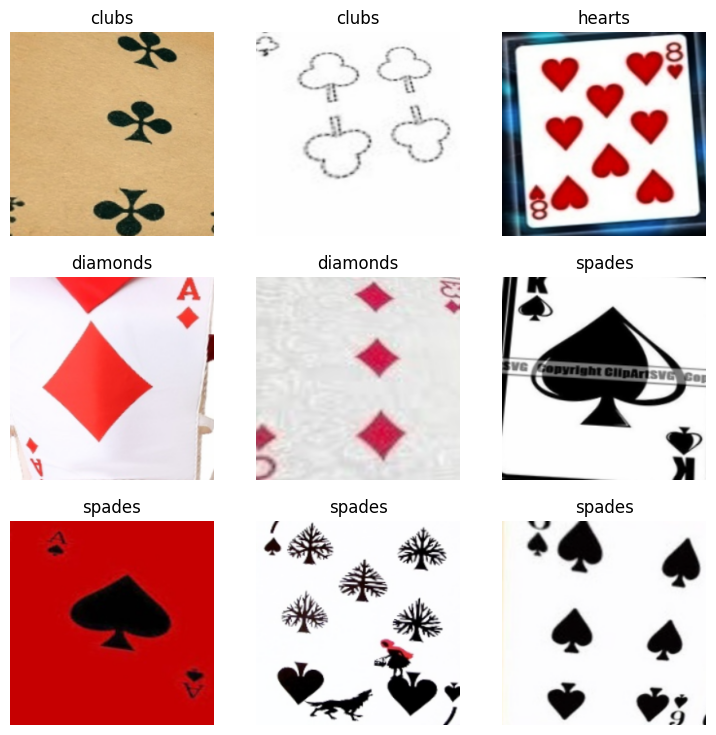

In [54]:
# Cosntruimos dataLoader
trainPath = Path('/content/drive/MyDrive/IA/dataset/palos/train')
dls = db.dataloaders(trainPath,bs=128)

# Comprobamos que se han cargado adecuadamente
dls.show_batch()

In [6]:
!ls /content/drive/MyDrive/IA/dataset/train/palos/hearts/| wc -l

1300


## Creación del modelo

In [55]:
learn = vision_learner(dls,resnet18,metrics=accuracy).to_fp16()
# Utilizamos fine tuning
learn.fine_tune(10,base_lr=1e-3)
# Exportamos el modelo
learn.export()

epoch,train_loss,valid_loss,accuracy,time
0,1.284515,0.621426,0.774451,00:46


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,accuracy,time
0,0.665710,0.511324,0.811045,00:46
1,0.534704,0.425708,0.846973,00:49
2,0.409012,0.334554,0.880905,00:48
3,0.306337,0.285840,0.896873,00:47
4,0.231996,0.257924,0.904192,00:47
5,0.183227,0.289532,0.906188,00:44
6,0.151291,0.237032,0.926148,00:45
7,0.133005,0.232764,0.926813,00:45
8,0.119459,0.239613,0.929474,00:48
9,0.114998,0.232363,0.930805,00:51


In [56]:
from google.colab import files

# Descargar el archivo
files.download('export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cargamos el modelo

In [ ]:
import pathlib

plt = platform.system()

if plt == 'Linux': pathlib.WindowsPath = pathlib.PosixPath

learn = load_learner('export.pkl')

## Interpretación de resultados

In [57]:
interp = ClassificationInterpretation.from_learner(learn)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


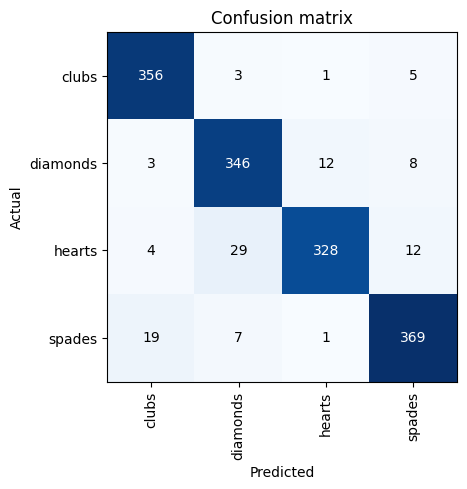

In [58]:
# Mostramos la matriz de confusión
interp.plot_confusion_matrix()

## Evaluar modelo

In [26]:
!ls /content/drive/MyDrive/IA/dataset/test/palos

clubs  diamonds  hearts  spades


In [59]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(224),
                 batch_tfms=[*aug_transforms(size=256,min_scale=0.75),Normalize.from_stats(*imagenet_stats)] )
dlsTest = dbTest.dataloaders('/content/drive/MyDrive/IA/dataset/palos',bs=128)

learn.dls = dlsTest

In [60]:
# Evaluamos
learn.validate()

(#2) [0.15695051848888397,0.9461538195610046]

## Prueba unitaria

In [39]:
learn.predict('/content/drive/MyDrive/IA/dataset/palos/test/clubs/9_1.jpg')

('clubs', tensor(0), tensor([1.0000e+00, 5.1926e-08, 9.0398e-10, 5.0231e-08]))